In [23]:
import pandas as pd
import numpy as np

from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [24]:
df_data_input_train = pd.read_csv('kendaraan_train.csv')
df_data_input_test = pd.read_csv('kendaraan_test.csv')

In [25]:
frame = [df_data_input_train, df_data_input_test]
dataset = pd.concat(frame)

In [26]:
# Data Preprocessing

# penghapusan kolom id premi kanal_penjualan lama_berlangganan
# dikarenakan fitur yang menurut kami tidak berkaitan dalam penentuan label

dataset.drop(columns=['id','Premi','Kanal_Penjualan','Lama_Berlangganan'], inplace=True)

# penghapusan data yang memiliki mising value

dataset.dropna(inplace=True)

# pengisian data menggunakan median

#dataset.fillna(dataset.median(), inplace=True)

# melakukan label encode

lbl_enc = dataset[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']]
dataset[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']] = lbl_enc.apply(LabelEncoder().fit_transform)

In [27]:
# Split dataset

# membagi dataset menjadi data latih dan data uji
# data uji diambil sebanyak 20% dari data yang ada

X = dataset.iloc[:, 0:7]
y = dataset.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

<AxesSubplot:>

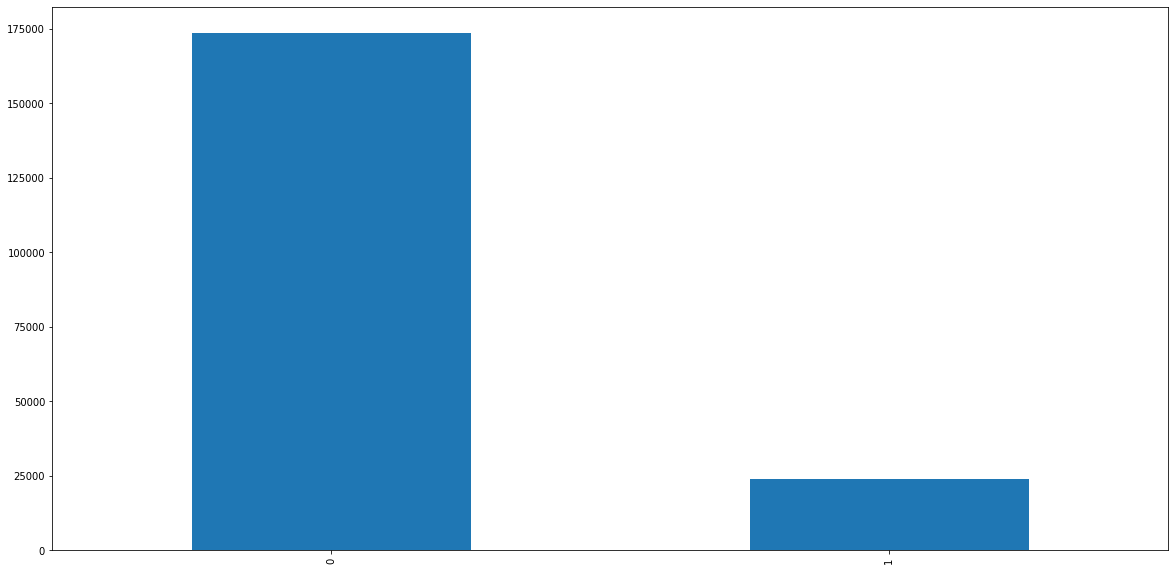

In [28]:
y_train.value_counts().plot.bar(figsize=[20,10])

In [29]:
# Oversampling SMOTE

# Penggunaan Oversampling karena jumlah data 
# pada kelas yang ada sangat jauh

ns = SMOTETomek(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

C:\Python38\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [30]:
# Scaling

# Penggunaan scaling pada data yang ada
scaler = StandardScaler()
X_train_ns = scaler.fit_transform(X_train_ns)
X_test = scaler.transform(X_test)

In [31]:
# Classification Model

# terdapat 4 model yaitu KNN, Random Forest, Logistic Regression, Naive Bayes

# KNN
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Random Forest
#classifier = RandomForestClassifier(max_depth=4, random_state=0)

# Logistic Regression
#classifier = LogisticRegression(random_state=0)

# Naive Bayes
#classifier = GaussianNB()

classifier.fit(X_train_ns, y_train_ns)
y_pred = classifier.predict(X_test)

In [32]:
# Evalutaion

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39815  3534]
 [ 4596  1489]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     43349
           1       0.30      0.24      0.27      6085

    accuracy                           0.84     49434
   macro avg       0.60      0.58      0.59     49434
weighted avg       0.82      0.84      0.83     49434

